In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [12]:
def fun_f1(threshold, ksize):
    f = open("temporalROI.txt", "r")
    line = f.readline()
    roi_start, roi_end = line.split()
    roi_start = int(roi_start)
    roi_end = int(roi_end)

    step = 2
    # start = 300
    # stop = 1100

    TP = 0
    TN = 0
    FP = 0
    FN = 0

    I_prev_read = cv2.imread("input/in%06d.jpg"%roi_start)
    I_prev_g = cv2.cvtColor(I_prev_read, cv2.COLOR_BGR2GRAY)
    I_prev = I_prev_g

    for i in range(roi_start, roi_end, step):
        I = cv2.imread("input/in%06d.jpg"%i)
        # cv2.imshow("I", I)
        IG = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
        # I_diff = IG.astype('int') - I_prev.astype('int')
        I_diff = cv2.absdiff(IG, I_prev)
        # cv2.imshow("IG", IG)
        # cv2.imshow("Diff", I_diff)
        (T, thresh) = cv2.threshold(I_diff, threshold, 255, cv2.THRESH_BINARY)
        # cv2.imshow("Thresh", thresh)

        kernel = np.ones((3,3), np.uint8)
        B1 = cv2.erode(thresh, kernel, iterations=1)
        # cv2.imshow("Binary1", B1)
        kernel = np.ones((4, 4), np.uint8)
        B2 = cv2.dilate(B1, kernel, iterations=2)
        # cv2.imshow("Binary2", B2)
        kernel = np.ones((2, 2), np.uint8)
        B3 = cv2.erode(B2, kernel, iterations=1)
        # cv2.imshow("Binary3", B3)
        B4 = cv2.medianBlur(B3, ksize)
        # cv2.imshow("Binary4", B4)

        retval, labels, stats, centroids = cv2.connectedComponentsWithStats(B4)
        # cv2.imshow("Labels",  np.uint8(labels/retval*255))
        cv2.waitKey(10)
        I_prev=IG

        I_VIS = I # copy of the input image

        if (stats.shape[0]>1):
            tab = stats[1:,4]
            pi = np.argmax(tab)
            pi = pi+1

            cv2.rectangle(I_VIS, (stats[pi,0], stats[pi,1]), (stats[pi, 0]+stats[pi, 2], stats[pi, 1]+stats[pi, 3]), (255,0,0), 2)
            cv2.putText(I_VIS, "%f" % stats[pi, 4], (stats[pi, 0], stats[pi, 1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0))
            cv2.putText(I_VIS, "%d" % pi, (int(centroids[pi, 0]), int(centroids[pi, 1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0))
            # cv2.imshow("I_VIS", I_VIS)


        
        G = cv2.imread("input/in%06d.jpg"%i)
        GT = cv2.cvtColor(G, cv2.COLOR_BGR2GRAY)
        # cv2.imshow("G", GT)
        TP_M = np.logical_and((B4 == 255), (GT == 255))
        TP_S = np.sum(TP_M)
        TP = TP + TP_S

        FP_M = np.logical_and((B4 == 255), (GT == 0))
        FP_S = np.sum(FP_M)
        FP = FP + FP_S

        FN_M = np.logical_and((B4 == 0), (GT == 255))
        FN_S = np.sum(FN_M)
        FN = FN + FN_S

    P = TP/(TP+FP) # presission
    R = TP/(TP+FN) # recall
    F1 = 2*P*R/(P+R)
    return P, R, F1

# print("Precission: ", P, "Recall: ", R, "F1: ", F1)
# Precission:  0.9729357798165138 Recall:  0.11259754738015608 F1:  0.20183660845981827

In [22]:
ksize = np.arange(1,14,2)
threshold = np.arange(1,10,2)
x = []
P_list = []
R_list = []
F1_list = []
for i in threshold:
    for j in ksize:
        x.append((i,j))
        P, R, F1 = fun_f1(i, j)
        P_list.append(P)
        R_list.append(R)
        F1_list.append(F1)
        print(i,j," : ",P,R,F1)


1 1  :  0.9036332671019018 0.33800499017890323 0.4919831549665804
1 3  :  0.9030837004405287 0.3373679460635982 0.4912267140759063
1 5  :  0.9026131657860916 0.3355629877369008 0.4892414860681114
1 7  :  0.9023004828173814 0.3373148590539895 0.4910545229722941
1 9  :  0.9025188558417533 0.3366778149386845 0.49041138261676454
1 11  :  0.9023169336384439 0.3349259436215958 0.4885206550776259
1 13  :  0.9025017869907076 0.3351382916600308 0.4887736141220192
3 1  :  0.927023945267959 0.1726389552476509 0.2910718281494742
3 3  :  0.9292782305005821 0.16950682168073472 0.28671485655277684
3 5  :  0.9355992844364938 0.16658703615225354 0.2828173583885359
3 7  :  0.938115763546798 0.1617561182778574 0.27593389178175237
3 9  :  0.94272 0.1563943303073738 0.2682815772698297
3 11  :  0.9493414387031408 0.1492275840101927 0.2579135700522983
3 13  :  0.9611170024743726 0.1443435791261878 0.25099233822579153
5 1  :  0.96191282268303 0.12066677284068589 0.21443396226415096
5 3  :  0.964548205793342 0

In [26]:
print(x[1])

(1, 3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


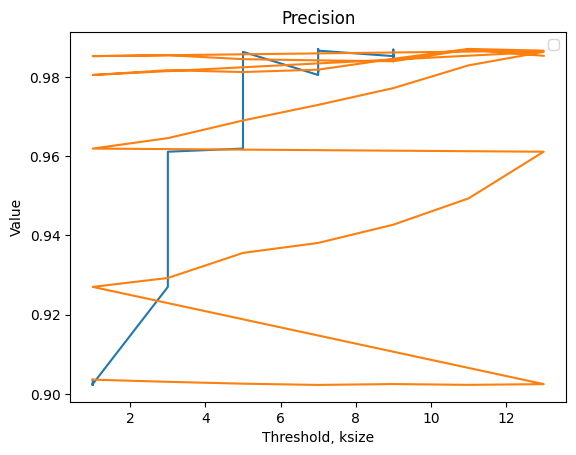

In [25]:

plt.plot(x, P_list)
plt.legend(loc='best')
plt.title("Precision")
plt.xlabel('Threshold, ksize')
plt.ylabel("Value")
plt.show()

In [ ]:
plt.plot(x, R)
plt.title("Recall")
plt.xlabel('Threshold, ksize')
plt.ylabel("Value")
plt.show()

In [ ]:
plt.plot(x, F1)
plt.title("F1")
plt.xlabel('Threshold, ksize')
plt.ylabel("Value")
plt.show()